In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image_path = "data/images_liver.nii.gz"
label_path = "data/liver_labels/l1.nii"

In [21]:
images = nib.load(image_path).get_fdata()
labels = nib.load(label_path).get_fdata()[..., 0, :]

# Correct the orientation of the images
labels = np.transpose(labels, (2, 0, 1))
labels = np.transpose(labels, (0, 2, 1))

# Crop the extra pixels
labels = labels[:, :-4, :]

In [23]:
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

Image shape: (200, 512, 256)
Label shape: (200, 512, 256)


In [25]:
print("Unique labels:", np.unique(labels))

Unique labels: [ 2.  3.  4.  6. 11. 12. 13.]


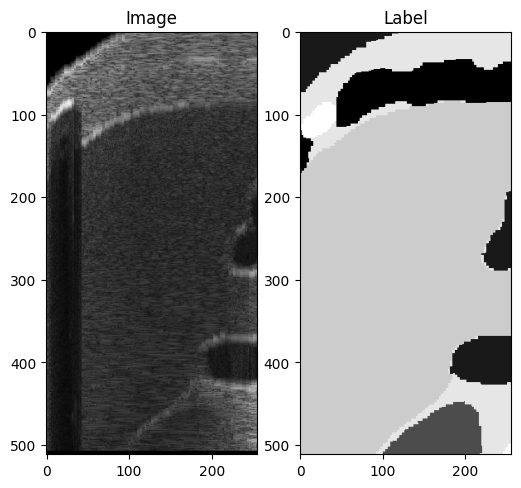

In [26]:
random_slices = np.random.randint(0, images.shape[0], 1)

for i in random_slices:
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(images[i, ...], cmap="gray")
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.imshow(labels[i, ...], cmap="gray")
    plt.title("Label")
    plt.show()

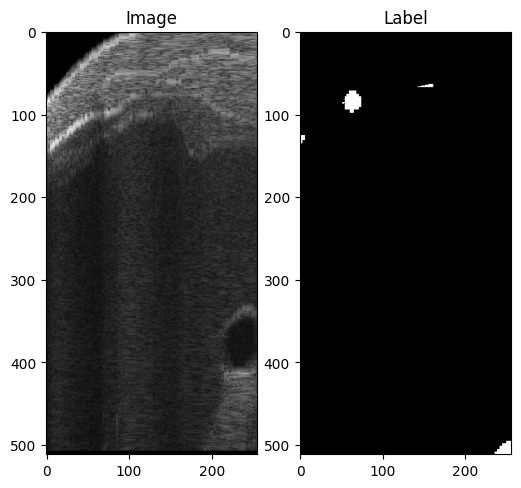

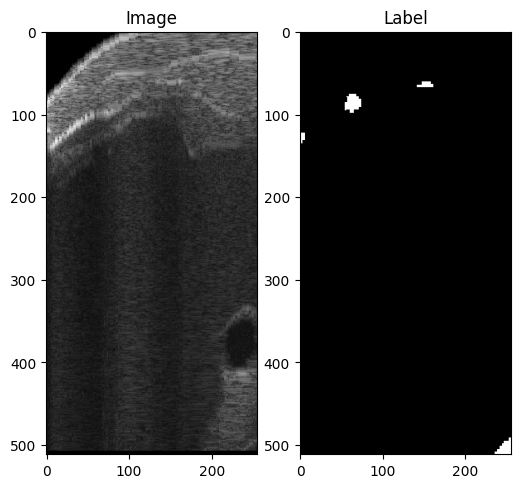

In [48]:
random_slices = np.random.randint(0, images.shape[0], 2)

spesific_mask = labels == 13 # Bone label is 13

for i in random_slices:
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(images[i, ...], cmap="gray")
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.imshow(spesific_mask[i, ...], cmap="gray")
    plt.title("Label")
    plt.show()